In [1]:
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from sklearn.metrics import adjusted_mutual_info_score
import math
import matplotlib.pyplot as plt
import random
from skimage.transform import resize

In [2]:
#load the MNIST data from tensorflow
(train_image, train_gt), (test_image, test_gt) = mnist.load_data()

In [3]:
def vectorize(array):
    """vectorizes the image"""
    result = []
    for row in array:
        result += tuple(row)

    return np.array(result)

In [4]:
def cut(image):
    """removes rows that do not contain non-zero pixels"""
    result = []
    for row in image:
        if set(list(row)) != set([0]): result.append(row)
    return result

In [5]:
def crop(image):
    """crops all four edges of the image using the cut method"""
    return np.array(cut(np.array(cut(image)).transpose())).transpose()

In [6]:
#crops and vectorizes each image in the dataset

data = []

train_image = list(train_image)

for img in train_image: 
    data.append(vectorize(resize(crop(img), (28,28))))

C:\Users\MYChe\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\MYChe\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [7]:
#transposes the data array so that samples are columns

np_data = np.array(data)
np_data = np_data.transpose()

In [8]:
#set the value of K for NMF
num = 10

In [9]:
model = NMF(n_components=num, init="random", solver="cd")

In [10]:
W = model.fit_transform(np_data)
H = model.components_

In [11]:
#determine the predicted label of each sample by taking the index of the max value of each col of H
predicted_labels = []
for x in range(H[0].size):
    vector = list(H[:,x])
    predicted_labels.append(vector.index(max(vector)))

In [12]:
#calculate adjusted mutual info score/error
adjusted_mutual_info_score(train_gt,predicted_labels,"arithmetic")

0.2513565742413777

In [13]:
#plots the results with ground truth as the color, coordinate randomly assigned based on predicted label 
angle = math.pi / 5
radius = 5

In [14]:
central_point = {}  # central point of the five distinct circles, each will have radius 1

for i in range(num):
    central_point[i] = (radius * math.cos(angle * i), radius * math.sin(angle * i))

In [15]:
#colors assigned based on ground truth
colors = {0:"red", 1:"orange", 2:"yellow", 3:"green", 4:"blue", 5:"purple", 6:"cyan", 7:"magenta", 8:"black", 9:"pink"} 

In [16]:
#assigning point coordinates and color
coords = {}
for i in range(len(predicted_labels)):
    a = random.random() * 2 * math.pi
    r = math.sqrt(random.random())
    
    (x,y) = central_point[predicted_labels[i]]
    
    coords[r * math.cos(a) + x, r * math.sin(a) + y] = colors[train_gt[i]]

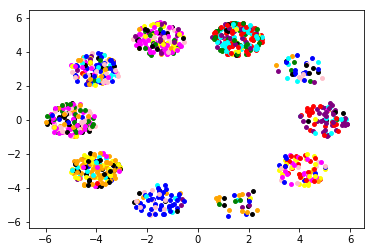

In [17]:
keys = tuple(coords.keys())

for index in range(1000):
    plt.scatter(keys[index][0], keys[index][1], color=coords[keys[index]], s=15)

In [18]:
#MNIST dataset is extremely difficult to cluster using this NMF method
#future work, use PCA on the resulting W and H matrices to further refine this